In [1]:
import sys
from pathlib import Path
import torch
import yaml

ROOT = Path.cwd()
while ROOT != ROOT.parent and not (ROOT / "src").exists():
    ROOT = ROOT.parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

from src.train.utils import multi_label_train_loop, plot_metrics

print("Repo root:", ROOT)


Repo root: d:\qingchaolaopian\Instrument Sound\GitHub\ml-based-analysis-of-sound


In [2]:
IRMAS_RUN = "IRMAS_mel_v1"
WEIGHTS_DIR = Path(f"../models/saved_weights/{IRMAS_RUN}")
USE_CKPT = False  # True to resume from last.pt

MANIFEST_CSV = ["../../data/processed/irmas_train_mels.csv"]
LABELS_YAML = "../configs/labels_irmas.yaml"
AUDIO_CONFIG_YAML = "../configs/audio_params_irmas.yaml"

CONFIG = {
    "batch_size": 64,
    "lr": 1e-3,
    "epochs": 300,
    "patience": 30,
    "weight_decay": 1e-4,
    "dropout": 0.5,
    "val_frac": 0.2,
    "seed": 1337,
    "threshold": 0.5
}



In [3]:
with open(AUDIO_CONFIG_YAML, 'r', encoding='utf-8') as f:
    audio_params = yaml.safe_load(f)
with open(LABELS_YAML, 'r', encoding='utf-8') as f:
    label_config = yaml.safe_load(f)
    classes = [c.strip().lower() for c in label_config.get('train_labels', [])]
print(f"Loaded {len(classes)} classes: {', '.join(classes)}")

resume_ckpt = WEIGHTS_DIR / "last.pt" if USE_CKPT else None
if resume_ckpt is None:
    print("Starting fresh (resume disabled).")
elif not resume_ckpt.exists():
    resume_ckpt = None
    print("Starting fresh. No previous weights found.")
else:
    print(f"Existing weights detected. Resuming from {resume_ckpt}")

results = multi_label_train_loop(
    manifest_csv=MANIFEST_CSV,
    classes=classes,
    ckpt_dir=WEIGHTS_DIR,
    epochs=CONFIG["epochs"],
    batch_size=CONFIG["batch_size"],
    lr=CONFIG["lr"],
    weight_decay=CONFIG["weight_decay"],
    val_frac=CONFIG["val_frac"],
    dropout=CONFIG["dropout"],
    patience=CONFIG["patience"],
    num_workers=0,
    threshold=CONFIG["threshold"],
    seed=CONFIG["seed"],
    audio_cfg=audio_params['audio'],
    resume_from=resume_ckpt,
    save_best_stamped=False,
)

history = results["history"]


Loaded 11 classes: cel, cla, flu, gac, gel, org, pia, sax, tru, vio, voi
Starting fresh (resume disabled).
[1/300] Loss: 0.3067/0.2740 | Val MicroF1: 0.0000 | Time: 6.6s
[2/300] Loss: 0.2670/0.2470 | Val MicroF1: 0.1055 | Time: 6.1s
[3/300] Loss: 0.2443/0.2243 | Val MicroF1: 0.2798 | Time: 6.1s
[4/300] Loss: 0.2234/0.1990 | Val MicroF1: 0.4517 | Time: 5.9s
[5/300] Loss: 0.1996/0.1804 | Val MicroF1: 0.5297 | Time: 5.9s
[6/300] Loss: 0.1796/0.1674 | Val MicroF1: 0.5589 | Time: 5.9s
[7/300] Loss: 0.1637/0.1525 | Val MicroF1: 0.6416 | Time: 5.8s
[8/300] Loss: 0.1525/0.1484 | Val MicroF1: 0.6495 | Time: 5.9s
[9/300] Loss: 0.1418/0.1536 | Val MicroF1: 0.6185 | Time: 5.8s
[10/300] Loss: 0.1303/0.1520 | Val MicroF1: 0.6422 | Time: 5.9s
[11/300] Loss: 0.1242/0.1370 | Val MicroF1: 0.6957 | Time: 5.8s
[12/300] Loss: 0.1120/0.1581 | Val MicroF1: 0.6406 | Time: 5.8s
[13/300] Loss: 0.1021/0.1425 | Val MicroF1: 0.6912 | Time: 5.9s
[14/300] Loss: 0.0933/0.1234 | Val MicroF1: 0.7502 | Time: 5.8s
[15/30

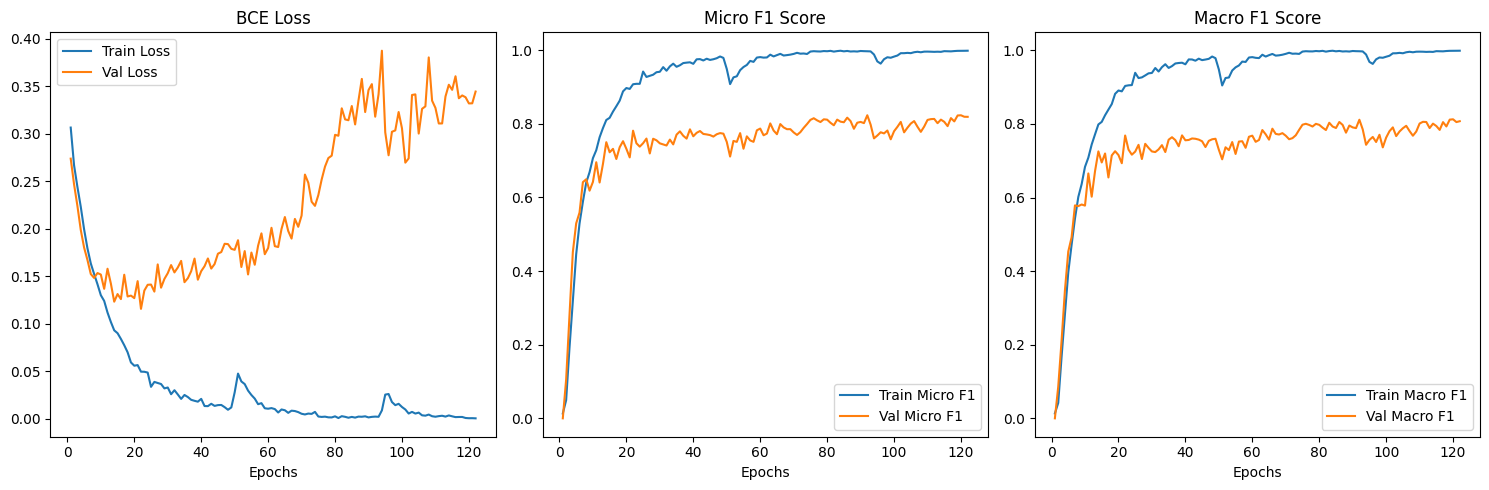

In [4]:
plot_metrics(history)
